In [2]:
import numpy as np
import math

In [4]:
in_array = [0, math.pi / 2, np.pi / 3, np.pi]
print ("Input array : \n", in_array)
 
cos_Values = np.cos(in_array)
print ("\nCosine values : \n", cos_Values)

Input array : 
 [0, 1.5707963267948966, 1.0471975511965976, 3.141592653589793]

Cosine values : 
 [ 1.000000e+00  6.123234e-17  5.000000e-01 -1.000000e+00]


In [10]:
x_arr = list(range(1,21))
res_arr = list(map(lambda a: np.cos(2*np.pi*a)/7 + a, x_arr))
res_arr

[1.1428571428571428,
 2.142857142857143,
 3.142857142857143,
 4.142857142857143,
 5.142857142857143,
 6.142857142857143,
 7.142857142857143,
 8.142857142857142,
 9.142857142857142,
 10.142857142857142,
 11.142857142857142,
 12.142857142857142,
 13.142857142857142,
 14.142857142857142,
 15.142857142857142,
 16.142857142857142,
 17.142857142857142,
 18.142857142857142,
 19.142857142857142,
 20.142857142857142]

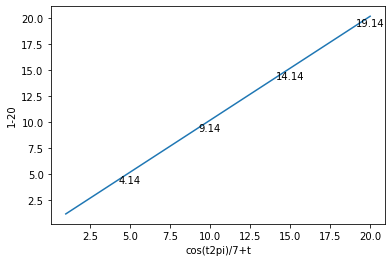

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_arr,res_arr)
plt.ylabel('1-20')
plt.xlabel('cos(t2pi)/7+t')
#plt.xticks(range(len(x_arr)), x_arr)
for i, v in enumerate(res_arr, 2):
    if i % 5 == 0:
        ax.text(i, v, "%.2f" %v, ha="center")
plt.show()

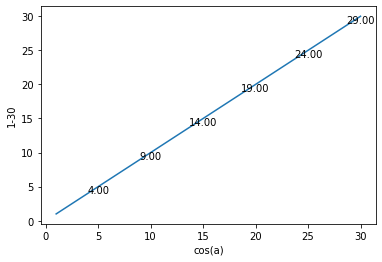

In [28]:
x_arr = list(range(1,31))
res_arr = list(map(lambda a: a, x_arr))
res_arr
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_arr,res_arr)
plt.ylabel('1-30')
plt.xlabel('cos(a)')
for i, v in enumerate(res_arr, 2):
    if i % 5 == 0:
        ax.text(i, v, "%.2f" %v, ha="center")
plt.show()

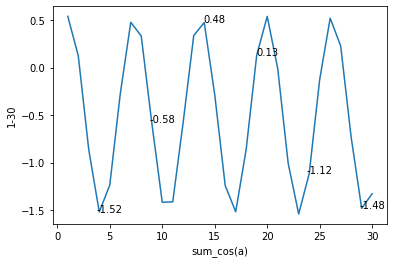

In [35]:
import pandas as pd
x_arr = list(range(1,31))
res_arr_stage = list(map(lambda a: np.cos(a), x_arr))
res_arr = pd.Series(res_arr_stage).cumsum().tolist()
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_arr,res_arr)
plt.ylabel('1-30')
plt.xlabel('sum_cos(a)')
for i, v in enumerate(res_arr, 2):
    if i % 5 == 0:
        ax.text(i, v, "%.2f" %v, ha="center")
plt.show()

In [ ]:
x_arr = list(range(1,31))
res_arr_stage = list(map(lambda a: (1/2)^(a-np.cos(a), x_arr))
res_arr = pd.Series(res_arr_stage).cumsum().tolist()
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_arr,res_arr)
plt.ylabel('1-30')
plt.xlabel('sum_cos(a)')
for i, v in enumerate(res_arr, 2):
    if i % 5 == 0:
        ax.text(i, v, "%.2f" %v, ha="center")
plt.show()

In [52]:
Xi = np.array([-4, -3,-2,-1,0,1,2,3,4])
#Xi = np.array([-4, -3])
#Xi = np.array([-4, -3,-2,-1,0,1,2,3,4])
N = np.size(Xi)
k = 6
Xs = np.average(Xi)

def autocovariance(Xi, N, k, Xs):
    autoCov = 0
    for i in np.arange(1, N):
        print("i:"+ str(i))
        autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
    return (1/(N-1))*autoCov

print("Autocovariance:", autocovariance(Xi, N, k, Xs))

i:1
i:2
i:3


IndexError: index 9 is out of bounds for axis 0 with size 9

In [57]:
# cov_auto_samp(X,delta)/cov_auto_samp(X,0) = auto correlation
def cov_auto_samp(X,delta):
    N = len(X)
    Xs = np.average(X)
    autoCov = 0.0
    times = 0.0
    for i in np.arange(0, N-delta):
        autoCov += (X[i+delta]-Xs)*(X[i]-Xs)
        times +=1
    return autoCov/times

In [82]:
list_1 = [-4, -3,-2,-1,0,1,2,3,4]
list_2 = [-1, 0 ,1 ,0 ,-1,0,1,0]
#cov_auto_samp([-4, -3,-2,-1,0,1,2,3,4], 1)
cov_auto_samp([-1, 0,1,0,-1,0,1,0], 5)

0.0

In [84]:
def _check_autocovariance_input(x):
        if len(x) < 2:
            raise ValueError('Need at least two elements to calculate autocovariance')

def get_autocovariance_given_lag(x, lag):
    _check_autocovariance_input(x)

    x_centered = x - np.mean(x)
    a = np.pad(x_centered, pad_width=(0, lag), mode='constant')
    b = np.pad(x_centered, pad_width=(lag, 0), mode='constant')
    return np.dot(a, b) / len(x)

def get_autocovariance(x):
    _check_autocovariance_input(x)
    x_centered = x - np.mean(x)
    return np.correlate(x_centered, x_centered, mode='full')[len(x) - 1:] / len(x)


get_autocovariance_given_lag(list_2, 4)

0.25

In [88]:
from random import seed
from random import random
from sklearn.metrics import mean_squared_error
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
print(random_walk)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
print(random_walk)
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
error = mean_squared_error(test, predictions)
print('Random MSE: %.3f' % error)

In [94]:
ra = [1,-1,-1,-1,1,1,-1,-1,-1]

su = 0
mu = .5

for r in ra:
    su += r - (.5 
    
print(su)

-1.5


In [90]:
-1 * .5 + (1 * .5)

0.0